### Template Matching using OpenCV

Match template image which is also available in main image, we can find this template and match in main image

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv.imread('messi5.jpg')

In [10]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #convert to grayscale

In [9]:
img_tem = cv.imread('messi_face.png', 0) #load messi face in greyscale

In [11]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

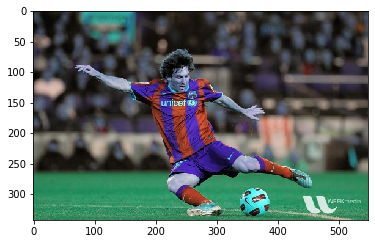

In [7]:
plt.imshow(image)

In [4]:
cv.imshow('messi', image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

### Match Template

try using different methods and work with threshold

In [12]:
#Match template method
#values:(imgsrc(gryscle_of original), template image(want to serach inside main image), method(diffent method to match)

res = cv.matchTemplate(image_gray, img_tem, cv.TM_CCOEFF_NORMED)

#### we review the result, all values are small number in matrix, but one number will be have the brightest point (eg. 0.8). Value 1 will be exact match. Point of template top left corner when matches the image at exact position will be the brightest point. 

#### So we have to find the brightest point in the matrix

In [13]:
print(res)

[[-0.08668111 -0.07510559 -0.05599722 ... -0.04320748 -0.05035986
  -0.05167269]
 [-0.06186049 -0.05237418 -0.03544044 ... -0.04497696 -0.0566895
  -0.06316213]
 [-0.04102729 -0.03340776 -0.01799893 ... -0.04797822 -0.06283636
  -0.07254124]
 ...
 [ 0.33614635  0.331955    0.330429   ... -0.00587249 -0.00434351
  -0.00507145]
 [ 0.29873857  0.30078366  0.2944406  ...  0.01756333  0.01940057
   0.02416761]
 [ 0.25252852  0.25518754  0.24402426 ...  0.05548268  0.05529013
   0.0567719 ]]


### Finding the Threshold for brightest point.

In [19]:
#using numpy where we will find the threshold value. 

thres = 0.91  #we sign variable, find the value returning brightest point by only one x and y value

loc = np.where(res >= thres)

print(loc)

(array([83]), array([220]))


#### The above location is the point for brightest point, which indicates the overlap of template image on original image.

#### Next Step: We find the width and height of template image

In [20]:
w, h = img_tem.shape[::-1] #we want to get the columns and rows in reverse order

#### Next Step will be drawing the rectange of size of template, over the original image. We use widht and height to draw the rectange. We know that there is only one messi face inside original image. Lets say, if there are serveral number of matched template inside original image we have draw over all the faces in that image. 

#### So we need to iterate using for loop over that result

In [21]:
#if multiple number of matched template
#iterate over loc variable, and find width and height, we reversing x asis and y axis

for pt in zip(*loc[::-1]): 
    
    #values:(org_image where to draw, first pt of rect. using loc(top-left), seond pt adding w and h to pt x and y)
    cv.rectangle(image, pt, (pt[0]+w, pt[1]+h), (0,255,0), 2)

In [22]:
cv.imshow('messi', image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

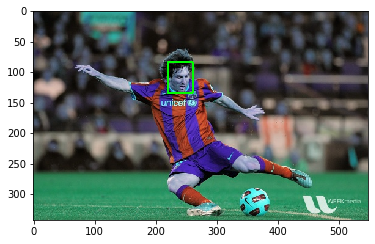

In [23]:
plt.imshow(image)